In [1]:
!pip install gluoncv
!pip install mxnet

     |████████████████████████████████| 348kB 9.6MB/s 
     |████████████████████████████████| 25.4MB 1.2MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

In [3]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


Model file is not found. Downloading.


100%|██████████| 132723/132723 [00:05<00:00, 25324.87KB/s]


In [4]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/street_small.jpg?raw=true',
                          path='street_small.jpg')


117KB [00:00, 12366.34KB/s]            


In [8]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving JF sitting cross legged.jpg to JF sitting cross legged.jpg
User uploaded file "JF sitting cross legged.jpg" with length 382609 bytes


In [0]:
#from mxnet import image
#img = image.imread('Duck.jpg')

In [10]:
!ls

'JF sitting cross legged.jpg'   sample_data   street_small.jpg


In [11]:
x, img = data.transforms.presets.ssd.load_test('JF sitting cross legged.jpg', short=512)#im_fname
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 627, 512)


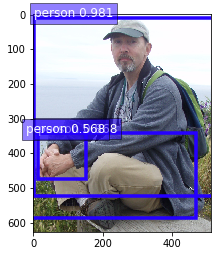

In [12]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
ax.grid(False)
plt.savefig('testplot.png')
plt.show()

In [13]:

!ls
files.download('testplot.png') 

'JF sitting cross legged.jpg'   sample_data   street_small.jpg	 testplot.png
